# Chi-squared Distribution ($k>1$)


## Theory
Given $k$ standard random variables $X_i \sim \mathcal{N}(0,1)$ for $i=1,\dots,k$ we would like to find the random variable $Y = \sum_{i=1}^k X_i^2$.
The analytic solution is known: $Y$ follows a chi-squared distribution with $k$ degrees of freedom.

Using polynomial chaos expansion (PCE), the problem can be solved using Galerkin projection.
Let $\{\phi_k \}_{k=0}^{n}$ be the monic orthogonal basis relative to the probability density of $X = [X_1, \dots, X_k]$, namely
$$
f_X(x) =  \prod_{i=1}^k \frac{1}{\sqrt{2 \pi}} \, \exp \left( - \frac{x_i^2}{2} \right).
$$
Then, the PCE of $X_i$ is given by
$$
X_i = \sum_{k=0}^n x_{i,k} \phi_k,
$$
with
$$
x_{i,0} = 0, \quad x_{i,i+1} = 1, \quad x_{i,l} = 0 \quad \forall l \in \{1,\dots,n\} \setminus \{i+1\}.
$$
To find the PCE coefficients $y_k$ for $Y = \sum_{k=}^n y_k \phi_k$, we apply Galerkin projection, which leads to
$$
y_m \langle \phi_m, \phi_m \rangle = \sum_{i=1}^k \sum_{j_1=0}^n \sum_{j_2=0}^n x_{i,j_1} x_{i,j_2} \langle \phi_{j_1} \phi_{j_2}, \phi_m \rangle \quad \forall m = 0, \dots, n.
$$
Hence, knowing the scalars $\langle \phi_m, \phi_m \rangle$, and $\langle \phi_{j_1} \phi_{j_2}, \phi_m \rangle$, the PCE coefficients $y_k$ can be obtained immediately.
From the PCE coefficients we can get the moments and compare them to the closed-form expressions.

__Notice:__ A maximum degree of 2 suffices to get the *exact* solution with PCE.
In other words, increasing the maximum degree to values greater than 2 introduces nothing but computational overhead (and numerical errors, possibly).


## Practice
First, we create a orthogonal basis relative to $f_X(x)$ of degree at most $d=2$ (`degree` below).

Notice that we consider a total of `Nrec` recursion coefficients, and that we also add a quadrature rule by calling `OrthoPolyQ()`.

In [2]:
k = 12
using PolyChaos
degree, Nrec = 2, 20
op = OrthoPoly("gaussian",degree;Nrec=Nrec);
opq = OrthoPolyQ(op) #OR: opq = OrthoPolyQ("gaussian",deg;Nrec=Nrec)


Univariate orthogonal polynomials
name:		gaussian
degree:		2
#coeffs:	20
α =		[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]...
β =		[1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]...

Measure dλ(t)=w(t)dt
name:		gaussian
w(t):		PolyChaos.w_gaussian
dom:		(-Inf, Inf)
symmetric:	true

Quadrature rule
name:		golubwelsch
N:		20
nodes		[-7.61905, -6.51059, -5.57874, -4.73458, -3.94397, -3.18901, -2.45866]...
weights		[1.2578e-13, 2.48206e-10, 6.12749e-8, 4.40212e-6, 0.000128826, 0.0018301, 0.0139978]...


Now let's define a multivariate basis

In [3]:
mop = MultiOrthoPoly([opq for i=1:k],degree)


12-variate orthogonal polynomials
name:		gaussian
		gaussian
		gaussian
		gaussian
		gaussian
		gaussian
		gaussian
		gaussian
		gaussian
		gaussian
		gaussian
		gaussian
deg:		2
dim:		91
ind:		[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


		[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
		[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
		[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
		[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
		[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
		[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
		...



Next, we define the PCE for all $X_i$ with $i = 1, \dots, k$.

In [4]:
L = dim(mop)
mu, sig = 0., 1.
x = [ assign2multi(convert2affinePCE("gaussian",mu,sig),i,mop.ind) for i=1:k ]

12-element Array{SparseArrays.SparseVector{Float64,Int64},1}:
   [2 ]  =  1.0
   [3 ]  =  1.0
   [4 ]  =  1.0
   [5 ]  =  1.0
   [6 ]  =  1.0
   [7 ]  =  1.0
   [8 ]  =  1.0
   [9 ]  =  1.0
   [10]  =  1.0
   [11]  =  1.0
   [12]  =  1.0
   [13]  =  1.0

With the orthogonal basis and the quadrature at hand, we can compute the tensors `t2` and `t3` that store the entries $\langle \phi_m, \phi_m \rangle$, and $\langle \phi_{j_1} \phi_{j_2}, \phi_m \rangle$, respectively.

In [5]:
t2 = Tensor(2,mop)
t3 = Tensor(3,mop)


3-dimensional tensor
dim:		3
nonzeros:	533

12-variate orthogonal polynomials
name:		gaussian
		gaussian
		gaussian
		gaussian
		gaussian
		gaussian
		gaussian
		gaussian
		gaussian
		gaussian
		gaussian
		gaussian
deg:		2
dim:		91
ind:		[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
		[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
		[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
		[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
		[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
		[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
		[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
		...



With the tensors at hand, we can compute the Galerkin projection.

Notice: there are more efficient ways to do this, but let's keep it simple.

In [6]:
y = [ sum( x[i][j1]*x[i][j2]*t3.get([j1-1,j2-1,m-1])/t2.get([m-1,m-1])  for i=1:k, j1=1:L, j2=1:L ) for m=1:L ]

91-element Array{Float64,1}:
 12.0               
  0.0               
  0.0               
  0.0               
  0.0               
  0.0               
  0.0               
  0.0               
  0.0               
  0.0               
  0.0               
  0.0               
  0.0               
  ⋮                 
  0.0               
  0.0               
  1.0000000000000029
  0.0               
  0.0               
  0.0               
  1.0000000000000029
  0.0               
  0.0               
  1.0000000000000029
  0.0               
  1.0000000000000029

Let's compare the moments via PCE to the closed-form expressions.

In [7]:
moms_analytic(k) = [k, sqrt(2k), sqrt(8/k)]
function myskew(y)
   e3 = sum( y[i]*y[j]*y[k]*t3.get([i-1,j-1,k-1]) for i=1:L,j=1:L,k=1:L )
   μ = y[1]
   σ = std(y,mop)
   (e3-3*μ*σ^2-μ^3)/(σ^3)
end

print("Expected value:\t\t$(moms_analytic(k)[1]) = $(mean(y,mop))\n")
print("\t\t\terror = $(abs(mean(y,mop)-moms_analytic(k)[1]))\n")
print("Standard deviation:\t$(moms_analytic(k)[2]) = $(std(y,mop))\n")
print("\t\t\terror = $(moms_analytic(k)[2]-std(y,mop))\n")
print("Skewness:\t\t$(moms_analytic(k)[3]) = $(myskew(y))\n")
print("\t\t\terror = $(moms_analytic(k)[3]-myskew(y))\n")


Expected value:		12.0 = 12.0
			error = 0.0
Standard deviation:	4.898979485566356 = 4.89897948556637
			error = -1.4210854715202004e-14
Skewness:		0.816496580927726 = 0.8164965809277036
			error = 2.2426505097428162e-14


Let's plot the probability density function to compare results.
We first draw samples from the measure with the help of `sampleMeasure()`, and then evaluate the basis at these samples and multiply times the PCE coefficients.
The latter stop is done using `evaluatePCE()`.
Both steps are combined in the function `samplePCE()`.
Finally, we compare the result agains the analytical PDF $\rho(t) = \frac{t^{t/2-1}\mathrm{e}^{-t/2}}{2^{k/2} \, \Gamma(k/2)}$ of the chi-squared distribution with one degree of freedom.

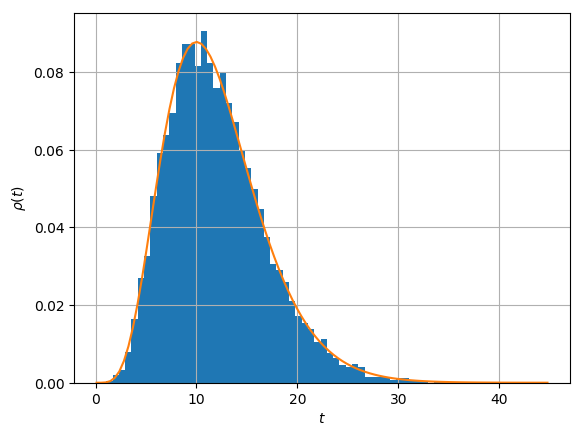

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1186
Expr(:block, #= Symbol("/Users/till/.julia/packages/Compat/hsya0/src/Compat.jl"):1891 =#, Expr(:call, :range, Expr(:parameters, Expr(:..., :kwargs)), :start, :stop) = Expr(:block, #= Symbol("/Users/till/.julia/packages/Compat/hsya0/src/Compat.jl"):1891 =#, Expr(:call, :range, Expr(:parameters, Expr(:kw, :stop, :stop), Expr(:..., :kwargs)), :start)))
  ** incremental compilation may be broken for this module **

Expr(:block, #= Symbol("/Users/till/.julia/packages/Compat/hsya0/src/Compat.jl"):1891 =#, Expr(:call, :range, Expr(:parameters, Expr(:..., :kwargs)), :start, :stop) = Expr(:block, #= Symbol("/Users/till/.julia/packages/Compat/hsya0/src/Compat.jl"):1891 =#, Expr(:call, :range, Expr(:parameters, Expr(:kw, :stop, :stop), Expr(:..., :kwargs)), :start)))
  ** incremental compilation may be broken for this module **

Expr(:block, #= Symbol("/Users/till/.julia/packages/Compat/hsya0/src/Compat.jl

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x122a4d860>

In [8]:
using PyPlot
Nsmpl = 10000
# ξ = sampleMeasure(Nsmpl,mop)
# ysmpl = evaluatePCE(y,ξ,mop)
ysmpl = samplePCE(Nsmpl,y,mop)
figure(1)
plt[:hist](ysmpl; density=true,bins=70)
grid(true); xlabel(L"$t$"); ylabel(L"$\rho(t)$");

import SpecialFunctions: gamma
ρ(t) = 1/(2^(0.5*k)*gamma(0.5*k))*t^(0.5*k-1)*exp(-0.5*t)
t = range(0.1; stop=maximum(ysmpl), length=100)
plot(t,ρ.(t))